# libraries

In [398]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image

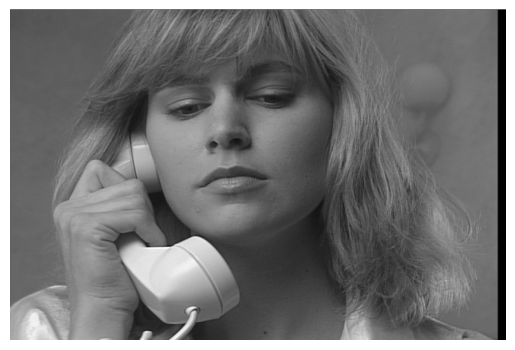

In [ ]:
image = None
path = 'susie_mono.png'

image = cv2.imread(path, cv2.IMREAD_UNCHANGED)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

#   Task 1: Calculate the entropy of the input image.

Text(0.5, 0, 'Pixel Value')

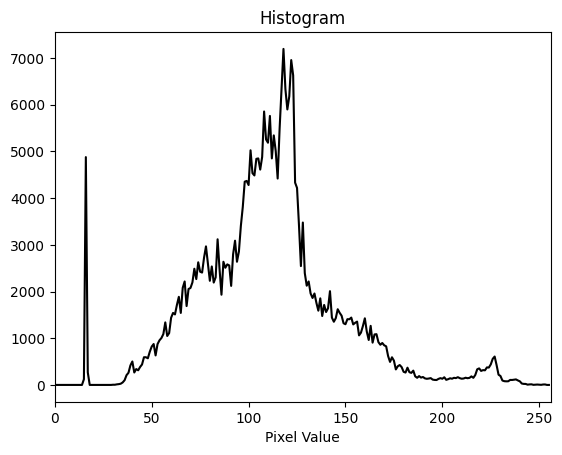

In [400]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.title('Histogram')
plt.xlabel('Pixel Value')

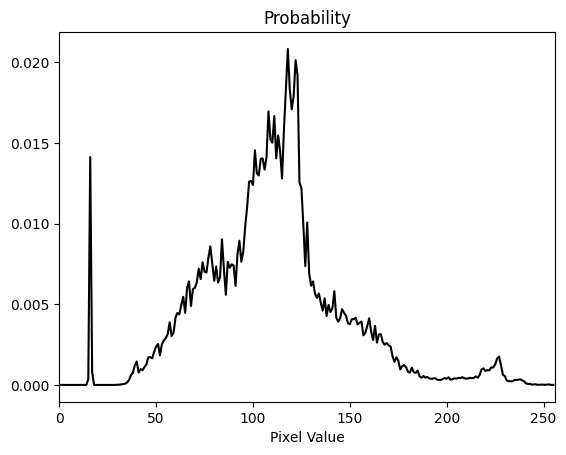

Entropy: 7.000965118408203


In [401]:
probability = hist / hist.sum()
plt.plot(probability, color='black')
plt.xlim([0, 256])
plt.title('Probability')
plt.xlabel('Pixel Value')
plt.show()

entropy = -np.sum(probability * np.log2(probability + 1e-10))  # 1e-10 to avoid log(0)
print(f'Entropy: {entropy}')

# Task 2: Difference Image (Predictive Coding)

Calculate the difference image so that each pixel value is replaced by the difference between its value and the value of its left neighbor (differential/predictive coding).  
For the first pixel in each row, assume the neighbor's value is 127 (the midpoint of the pixel value range).  
Display the difference image.  
Calculate the histogram of the difference image and compare it with the histogram of the original image.  
Calculate the entropy of the difference image and compare it with the entropy of the original image.  

**Note:**  
Pixel values in the difference image can range from **-255 to 255**!

In [402]:
# Convert the image to a signed integer type to handle negative differences
image_signed = image.astype(np.int16)

diff_image = np.zeros_like(image_signed, dtype=np.int16)

for y in range(image_signed.shape[0]):
    diff_image[y, 0] = image_signed[y, 0] - 127  # For the first pixel in the row, subtract 127
    for x in range(1, image_signed.shape[1]):
        diff_image[y, x] = image_signed[y, x] - image_signed[y, x-1]  # Subtract the left neighbor

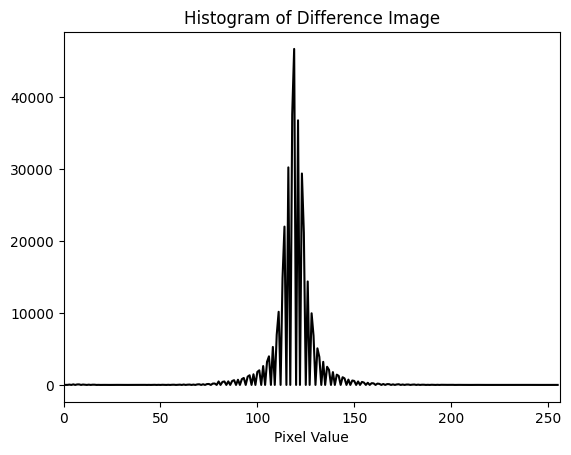

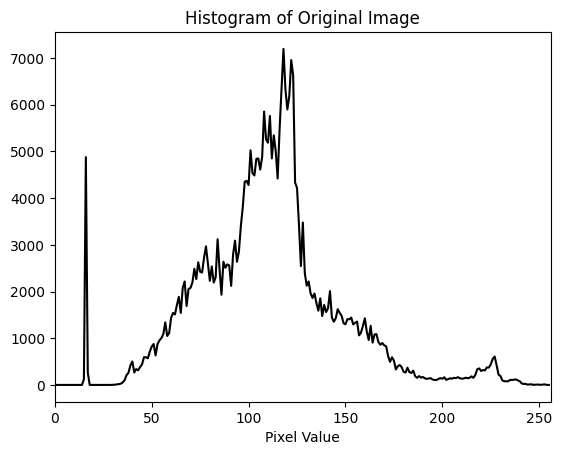

In [403]:
normalized_diff_image = cv2.normalize(diff_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

hist_diff = cv2.calcHist([normalized_diff_image], [0], None, [256], [0, 256])
plt.plot(hist_diff, color='black')
plt.xlim([0, 256])
plt.title('Histogram of Difference Image')
plt.xlabel('Pixel Value')
plt.show()

hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist_original, color='black')
plt.xlim([0, 256])
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.show()

### Entropy

In [404]:
entropy_original = -np.sum(hist_original / hist_original.sum() * np.log2(hist_original / hist_original.sum() + 1e-10))
entropy_diff = -np.sum(hist_diff / hist_diff.sum() * np.log2(hist_diff / hist_diff.sum() + 1e-10))
print(f'Entropy of Original Image: {entropy_original}')
print(f'Entropy of Difference Image: {entropy_diff}')

Entropy of Original Image: 7.000965118408203
Entropy of Difference Image: 4.397225856781006


# Task 3:
Calculate the DWT coefficients using the function provided in the sample script.  
Display each band separately.  
Calculate histograms and entropy for all bands.  
Compare the results (histogram, entropy) obtained for each band with each other (do any stand out and why?) and with the results obtained for the original image and the difference image.  


In [ ]:
def dwt(img):
    maskL = np.array([0.02674875741080976, -0.01686411844287795, -0.07822326652898785, 0.2668641184428723,
        0.6029490182363579, 0.2668641184428723, -0.07822326652898785, -0.01686411844287795, 0.02674875741080976])
    maskH = np.array([0.09127176311424948, -0.05754352622849957, -0.5912717631142470, 1.115087052456994,
        -0.5912717631142470, -0.05754352622849957, 0.09127176311424948])

    bandLL = cv2.sepFilter2D(img,         -1, maskL, maskL)[::2, ::2]
    bandLH = cv2.sepFilter2D(img, cv2.CV_16S, maskL, maskH)[::2, ::2]
    bandHL = cv2.sepFilter2D(img, cv2.CV_16S, maskH, maskL)[::2, ::2]
    bandHH = cv2.sepFilter2D(img, cv2.CV_16S, maskH, maskH)[::2, ::2]

    return bandLL, bandLH, bandHL, bandHH

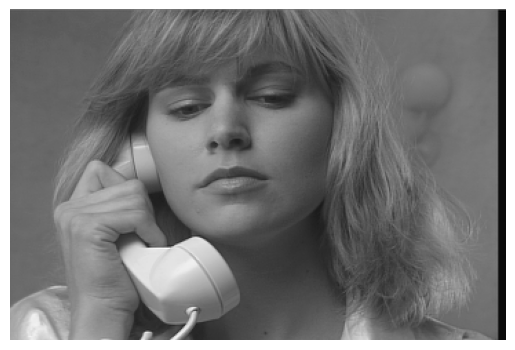

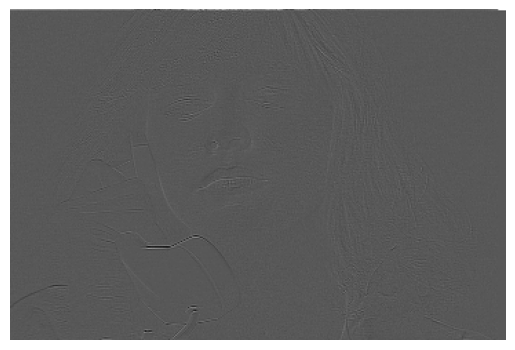

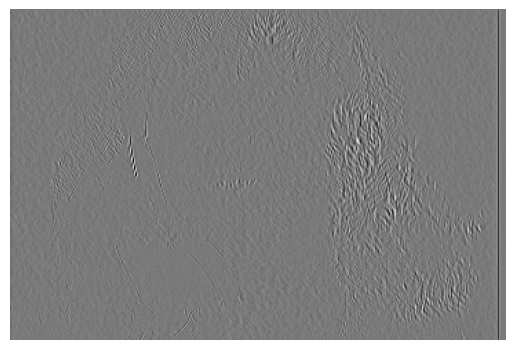

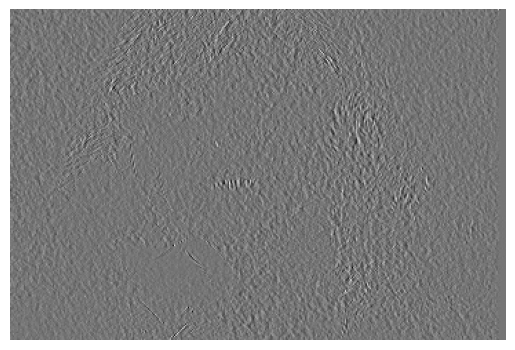

In [406]:
d = dwt(image)
plt.imshow(d[0], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(d[1], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(d[2], cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(d[3], cmap='gray')
plt.axis('off')
plt.show()

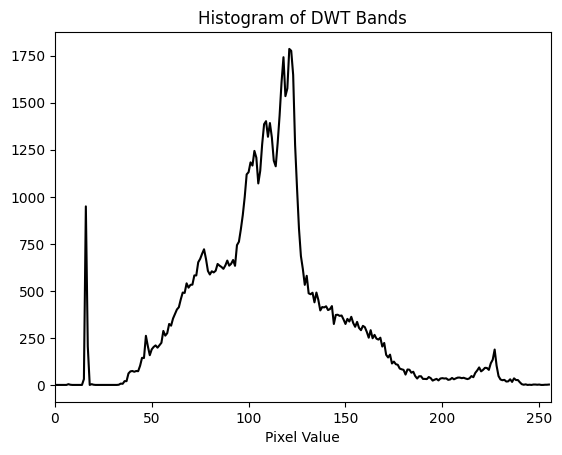

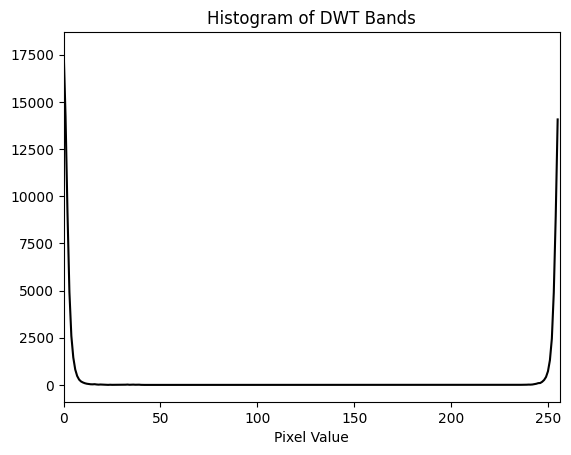

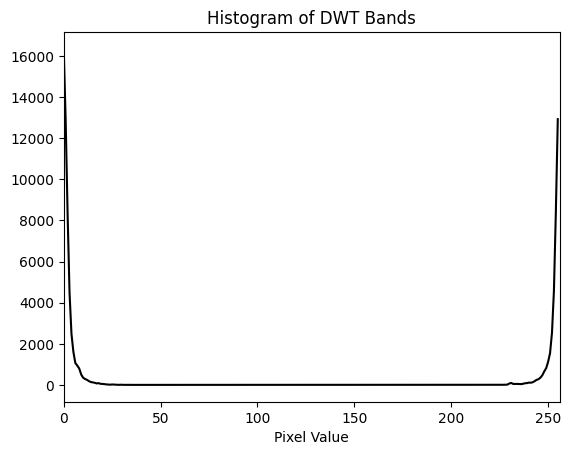

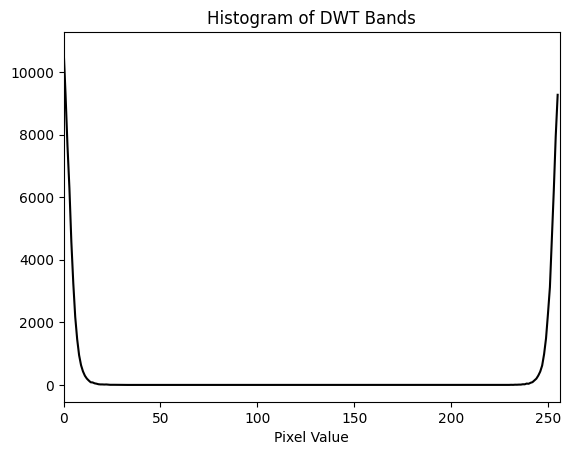

Entropy of LL: 6.993961334228516
Entropy of LH: 3.414457321166992
Entropy of HL: 3.7946298122406006
Entropy of HH: 4.054442882537842


In [407]:
d_uint8 = [band.astype(np.uint8) if band.dtype != np.uint8 else band for band in d]

entropy = lambda x: -np.sum(x / x.sum() * np.log2(x / x.sum() + 1e-10))

histLL = cv2.calcHist([d_uint8[0]], [0], None, [256], [0, 256])
histLH = cv2.calcHist([d_uint8[1]], [0], None, [256], [0, 256])
histHL = cv2.calcHist([d_uint8[2]], [0], None, [256], [0, 256])
histHH = cv2.calcHist([d_uint8[3]], [0], None, [256], [0, 256])

for hist in [histLL, histLH, histHL, histHH]:
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.title('Histogram of DWT Bands')
    plt.xlabel('Pixel Value')
    plt.show()


entropyLL = entropy(histLL)
entropyLH = entropy(histLH)
entropyHL = entropy(histHL)
entropyHH = entropy(histHH)

print(f'Entropy of LL: {entropyLL}')
print(f'Entropy of LH: {entropyLH}')
print(f'Entropy of HL: {entropyHL}')
print(f'Entropy of HH: {entropyHH}')

### Conclusions regarding entropy and histograms

1. **Entropy**:
    - The original image has higher entropy than the difference image, indicating more information in the original image.
    - In the DWT bands, the LL band has the lowest entropy (smooth areas), while the LH, HL, HH bands have higher entropy (edges and details).

2. **Histograms**:
    - The histogram of the original image is more dispersed, meaning greater pixel diversity.
    - The histogram of the difference image is concentrated around zero, which results from predictive coding.
    - The LL band histogram is concentrated, while the LH, HL, HH bands are more dispersed.

3. **Transformations**:
    - Predictive coding reduces entropy and compresses the histogram, which favors compression.
    - DWT divides the image into frequency bands, enabling analysis and compression.


# Task 4:

Calculate the bit rate (number of bits per pixel) for the image compressed with the PNG encoder (input image) and compare it with the previously calculated entropies of the original, difference, and wavelet-transformed images. Does a bit rate lower than the entropy mean that the relationship: l_avg ≥ H is not true?


In [408]:
import os

# Get the size of the compressed image in bytes
compressed_image_path = 'monochrome/susie_mono.png'
compressed_size_bytes = os.path.getsize(compressed_image_path)

compressed_size_bits = compressed_size_bytes * 8

total_pixels = image.shape[0] * image.shape[1]

bit_rate = compressed_size_bits / total_pixels

print(f'Bit rate (bits per pixel): {bit_rate}')
print(f'Entropy of Original Image: {entropy_original}')
print(f'Entropy of Difference Image: {entropy_diff}')
print(f'Entropy of LL Band: {entropyLL}')
print(f'Entropy of LH Band: {entropyLH}')
print(f'Entropy of HL Band: {entropyHL}')
print(f'Entropy of HH Band: {entropyHH}')

Bit rate (bits per pixel): 4.444837962962963
Entropy of Original Image: 7.000965118408203
Entropy of Difference Image: 4.397225856781006
Entropy of LL Band: 6.993961334228516
Entropy of LH Band: 3.414457321166992
Entropy of HL Band: 3.7946298122406006
Entropy of HH Band: 4.054442882537842


### Does a bit rate lower than entropy mean that the relationship: l_avg ≥ H is not true?
A lower bit rate than entropy does not mean that the relationship is false. This results from coding optimization, redundancy removal, and more effective compression methods that reduce the actual number of transmitted bits.

For the color image:

➢ Calculate the entropy for the RGB components of the test color image.

➢ Convert from RGB to YUV and calculate the entropy for the YUV components. Display the RGB and YUV components.  
Calculate histograms for all RGB and YUV components.  
Compare the results obtained for each component. Is the entropy for the UV components lower? What could be the reason for this lower value?

➢ Determine the relationship between distortion D and bitrate R (number of bits per image pixel): D = f(R) – the so-called R-D curve – for the JPEG encoder.  
Regulate the degree of compression (bitrate R) by setting the ‘quality’ parameter when saving the image to a file. The values of the ‘quality’ parameter should be chosen to obtain smooth plots.  
As a measure of distortion, use the peak signal-to-noise ratio (PSNR) and mean squared error (MSE).  
Visualize the relationships on plots (a separate plot for each measure).  
Make a subjective assessment of the reconstructed images (according to your own rating scale, e.g.: excellent quality, very good, good, average, poor, very poor, etc., or: distortions invisible, slightly visible, visible, very visible, unacceptable, etc.) and include these ratings in the report (not necessarily for each output image separately, rather group ratings for certain bitrate ranges).  
Compare the compression ratios obtained for the JPEG encoder with the compression ratio obtained for the PNG encoder (remember that in the first part of the lab a monochrome PNG image was used, and JPEG compression was performed for the color image; optionally, calculate the bitrate for the color image compressed with the PNG encoder).


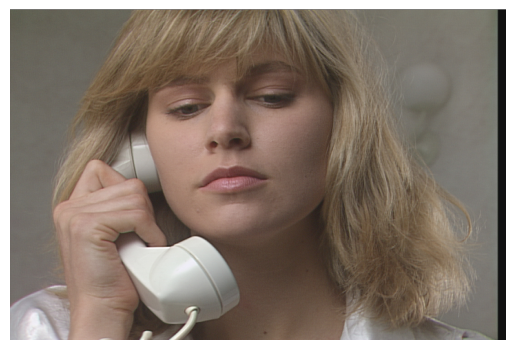

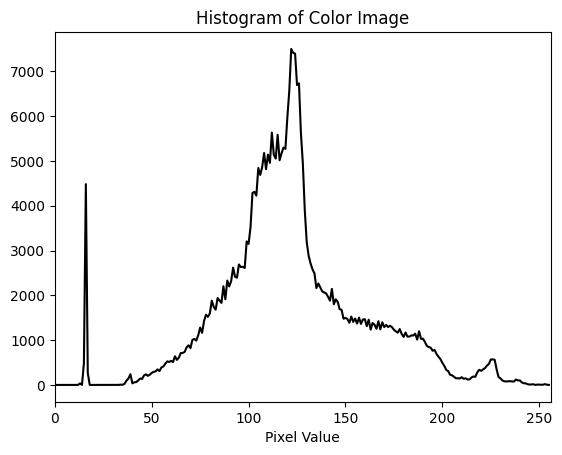

In [409]:
path = 'susie_col.png'

col_image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
col_image = cv2.cvtColor(col_image, cv2.COLOR_BGR2RGB)
plt.imshow(col_image)
plt.axis('off')
plt.show()

hist_col = cv2.calcHist([col_image], [0], None, [256], [0, 256])
plt.plot(hist_col, color='black')
plt.xlim([0, 256])
plt.title('Histogram of Color Image')
plt.xlabel('Pixel Value')
plt.show()

#   ➢ Calculate the entropy for the RGB components of the test color image.

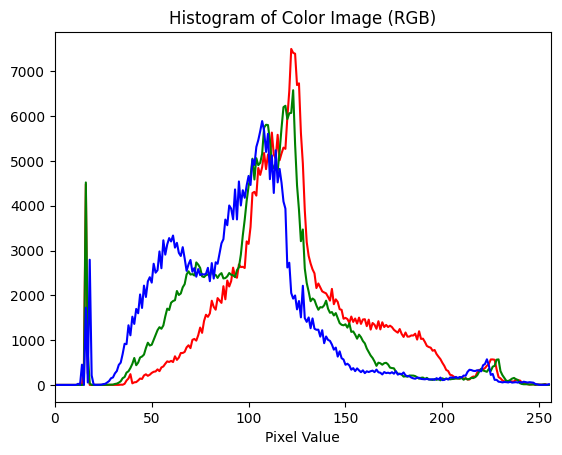

Entropy of Red Channel: 7.032151699066162
Entropy of Green Channel: 7.001433849334717
Entropy of Blue Channel: 7.036981105804443


In [410]:
R, G, B = col_image[:, :, 0], col_image[:, :, 1], col_image[:, :, 2]
hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
plt.plot(hist_R, color='red')
plt.plot(hist_G, color='green')
plt.plot(hist_B, color='blue')
plt.xlim([0, 256])
plt.title('Histogram of Color Image (RGB)')
plt.xlabel('Pixel Value')
plt.show()
entropy_R = entropy(hist_R)
entropy_G = entropy(hist_G)
entropy_B = entropy(hist_B)
print(f'Entropy of Red Channel: {entropy_R}')
print(f'Entropy of Green Channel: {entropy_G}')
print(f'Entropy of Blue Channel: {entropy_B}')

#   ➢ Convert from RGB to YUV and calculate the entropy for the YUV components. Display the RGB and YUV components. Calculate histograms for all RGB and YUV components. Compare the results obtained for each component. Is the entropy for the UV components lower? What could be the reason for this lower value?

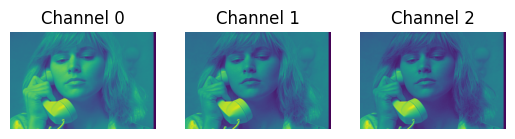

In [411]:
YUV = cv2.cvtColor(col_image, cv2.COLOR_RGB2YUV)
Y, U, V = cv2.split(YUV)

RGB, YUV = (col_image[:, :, 0], col_image[:, :, 1], col_image[:, :, 2]), (YUV[:, :, 0], YUV[:, :, 1], YUV[:, :, 2])

plt.subplot(1, 3, 1)
for i, channel in enumerate(RGB):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel)
    plt.axis('off')
    plt.title(f'Channel {i}')
plt.show()

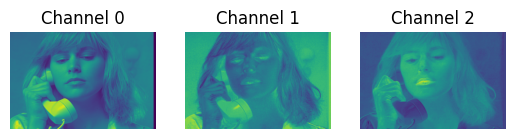

In [412]:
plt.subplot(1, 3, 1)
for i, channel in enumerate(YUV):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel)
    plt.axis('off')
    plt.title(f'Channel {i}')
plt.show()

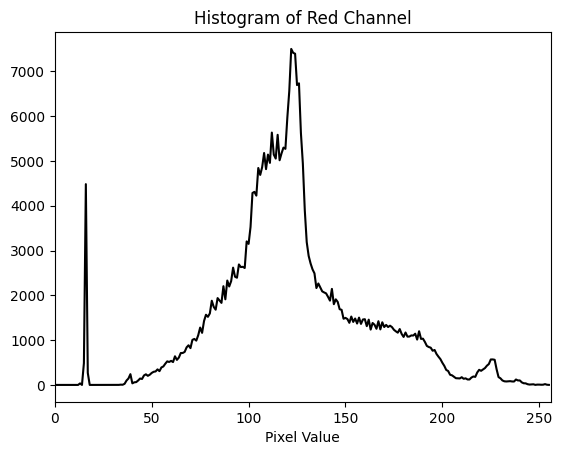

Entropy of Red Channel: 7.032151699066162


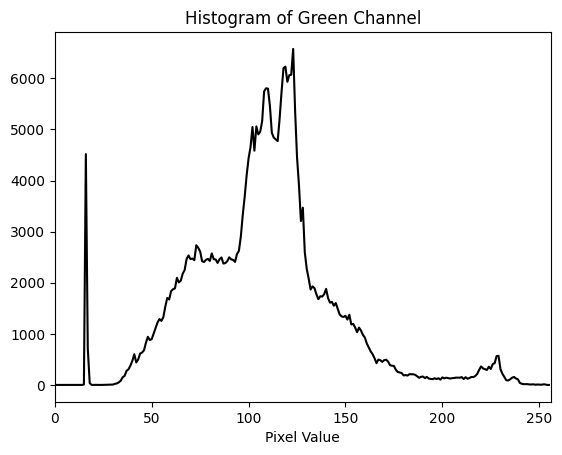

Entropy of Green Channel: 7.001433849334717


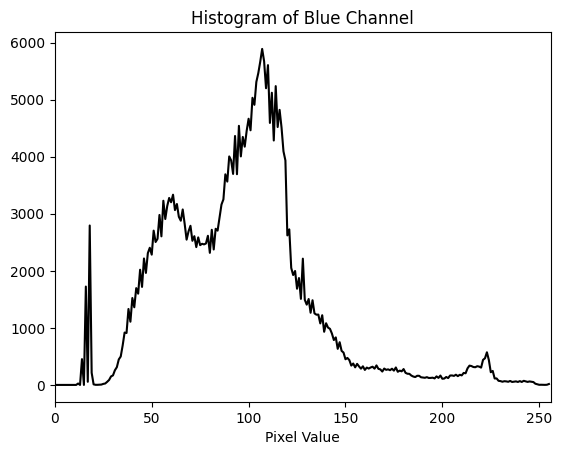

Entropy of Blue Channel: 7.036981105804443


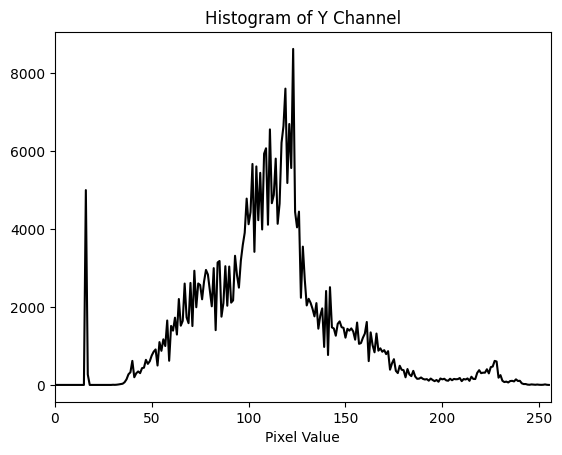

Entropy of Y Channel: 6.975262641906738


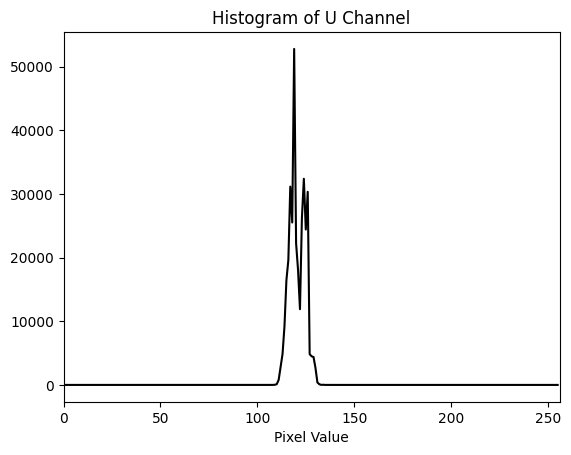

Entropy of U Channel: 3.896836280822754


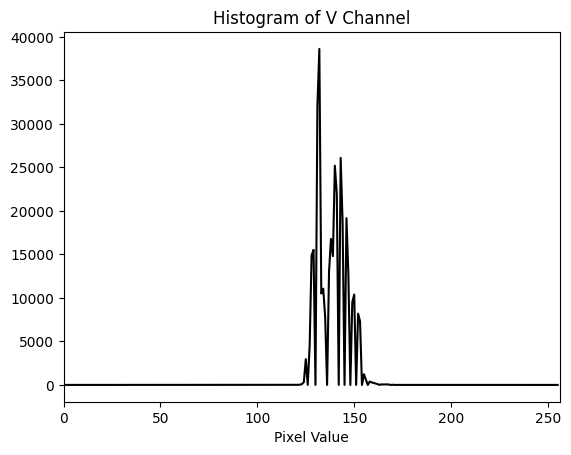

Entropy of V Channel: 4.319496154785156


In [419]:
for channel, name in zip(
    [col_image[:, :, 0], col_image[:, :, 1], col_image[:, :, 2], Y, U, V],
    ['Red', 'Green', 'Blue', 'Y', 'U', 'V']
):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.title(f'Histogram of {name} Channel')
    plt.xlabel('Pixel Value')
    plt.show()
    entropy_val = entropy(hist)
    print(f'Entropy of {name} Channel: {entropy_val}')

### Comparison of RGB and YUV  

1. **Entropy**:  
   - The **U** and **V** components in YUV have lower entropy than **R, G, B**.  
   - This is because YUV separates brightness (Y) from color (U, V), and the human eye is less sensitive to changes in color than in brightness.  

2. **Histograms**:  
   - **U and V** have a narrower range of values (less color diversity).  
   - **R, G, B** have more dispersed values (more color detail).  

3. **Why do UV have lower entropy?**  
   - The eye is more sensitive to brightness than color, so UV can be compressed more. 